**Table of contents**<a id='toc0_'></a>    
- [Résumé](#toc1_)    
  - [Problématique](#toc1_1_)    
  - [Méthodologie](#toc1_2_)    
  - [Modèles et tests](#toc1_3_)    
  - [Conclusions et export](#toc1_4_)    
- [Introduction](#toc2_)    
  - [Imports et prérequis](#toc2_1_)    
  - [Fonctions spécifiques](#toc2_2_)    
  - [Chargement des données](#toc2_3_)    
- [Méthodologie](#toc3_)    
  - [Métriques](#toc3_1_)    
  - [Définition du nombre de groupes](#toc3_2_)    
  - [Échantillonnage](#toc3_3_)    
- [Modèle hiérarchique](#toc4_)    
- [Modèle DBSCAN](#toc5_)    
- [Modèle k-Means](#toc6_)    
- [Tests de stabilité et nombre de groupes](#toc7_)    
- [Conclusions](#toc8_)    
  - [Choix du modèle](#toc8_1_)    
  - [Application sur les données client et export](#toc8_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=2
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Résumé](#toc0_)

Liens utiles :
- [notebook de l'analyse exploratoire](./P4_EDA.ipynb)
- [notebook des approches de modélisation](./P4_models.ipynb)
- [notebook de mise à jour de la segmentation](./P4_simul.ipynb)
- [projet OC](https://openclassrooms.com/fr/paths/794/projects/1502/assignment)

Sources métier :
- [données](https://www.kaggle.com/olistbr/brazilian-ecommerce)
- [Segmentation RFM](https://www.definitions-marketing.com/definition/segmentation-rfm/)

## <a id='toc1_1_'></a>[Problématique](#toc0_)

Suite à l'étude des données fournies par Olist, qui souhaite une segmentation de ses clients en vue de campagnes de communication quotidiennes, il est nécessaire de recourir à une **segmentation non supervisée**.

Elle doit permettre :
- une **description actionable de la segmentation** et de sa logique sous-jacente pour une utilisation optimale
- une **proposition de contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps

Ce document porte sur les **tests de modèles de segmentation non supervisée** en vue des actions décrites ci-avant.

Le jeu de données client a été importé **normalisé et réduit à 2 dimensions**, pour une taille de (91043, 2).

## <a id='toc1_2_'></a>[Méthodologie](#toc0_)

**3 modèles de clustering non supervisé** de types différents sont utilisés :
- un modèle **hiérarchique**
- un modèle **DBSCAN**
- un modèle **k-Means**

Chacun d'eux a ses atouts et limites.  
Ils sont évalués grâce à **2 métriques** : le **coefficient Silhouette** et l'**indice de Davies-Bouldin**, adaptées au caractère non supervisé des modèles.

Ne sachant pas le nombre de groupes idéal à l'avance, un des points-clés de la clusterisation non supervisée, la détermination est faite par des boucles de tests pour chaque modèle afin de comparer les scores en fonction du nombre de groupes.
L'usage devant rester **actionnable** par le service marketing, les tests sont effectués sur une **plage de 3 à 6 groupes**.

Pour réaliser ces nombreuses boucles avec des ressources et un temps de calcul raisonnable, un **échantillonnage du jeu de données** conservant une distribution similaire est réalisé en amont, représentant 30% du jeu de données (environ 8 mois).

## <a id='toc1_3_'></a>[Modèles et tests](#toc0_)

Le modèle `AgglomerativeClustering` est un modèle hiérarchique agglomératif fréquemment utilisé et fiable.  
Ses **scores sont assez satisfaisants** mais le modèle est **inutilisable en raison d'un trop grand temps de calcul**, surtout en augmentant le nombde de clients et la plage de durée.

Le modèle `DBSCAN` (*Density-Based Spatial Clustering of Applications with Noise*) est basé sur la densité : il recherche des points avec de nombreux voisins proches et définissent un cluster s'ils contiennent suffisamment de voisins (paramètre *MinPts* : `min_samples`) dans une distance maximale donnée (paramètre *epsilon* : `eps`).

Les valeurs de ces paramètres sont d'abord définies selon la documentation et les méthodes d'usage mais cela mène à un nombre inutilisable de groupes : plus de 700.  
En abusant du paramètre *epsilon* avec une valeur volontairement aberrante (mettant à mal la fiabilité le modèle), on constate qu'**on peut au mieux descendre à 11 groupes** avec cet algorithme.
Il est donc **inutilisable dans notre cas d'usage**.

Le très populaire et fiable modèle `kmeans` est basé sur des distances entre les points et permet une clusterisation très rapide avec plusieurs avantages :
- le nombre de clusters souhaité est précisé dès le départ
- le paramétrage est très faible, surtout grâce à l'initialisation avec `kmeans++` qui limite l'aléa et le nombre d'itérations nécessaires

Ce modèle est testé sur la plage de 3 à 6 groupes et ses bons résultats et faibles temps de calcul permettent de le sélectionner comme modèle.

Afin de **déterminer quel nombre de groupes** serait le plus souhaitable, les **scores Silhouette et Davies-Bouldin sont comparés**, auxquels s'ajoutent la **durée de calcul et la stabilité**.  
La stabilité est importante car elle définit la fiabilité des scores mesurés précédemment : elle est testée avec une boucle de 10 entraînements pour 3 à 6 groupes.  
Cela représente donc 40 lancements du modèle, un cadre qui permet d'apprécier sa faible durée de calcul.

Enfin, le modèle est testé sur d'autres aspects : inertie et séparation des groupes, homogénéité des individus, nombre d'erreurs.

## <a id='toc1_4_'></a>[Conclusions et export](#toc0_)

Avec un **clustering k-means à 5 groupes**, on obtient le meilleur compromis entre :
- les **scores** silhouette et Davies-Bouldin
- la **stabilité** du clustering selon les itérations
- l'**inertie** et la **séparation** des groupes
- la **durée de calcul**
- l'**homogénéité** des individus dans les groupes
- le **nombre d'erreurs** de groupe
- **interprétabilité** et **explicabilité** pour le marketing

Le modèle est donc **appliqué aux données** et la **clusterisation est exportée** à la fois au niveau du jeu de données clients et du jeu de données global. 

# <a id='toc2_'></a>[Introduction](#toc0_)

## <a id='toc2_1_'></a>[Imports et prérequis](#toc0_)

Pré-requis de fonctionnement :

Packages utilisés :

```
Python 3.11.6
-----
dill                0.3.7
IPython             8.18.1
jupyter_client      8.6.0
jupyter_core        5.5.0
jupyterlab          4.0.9
matplotlib          3.8.2
notebook            7.0.6
numpy               1.26.2
pandas              2.1.3
plotly              5.18.0
scipy               1.11.4
seaborn             0.13.0
session_info        1.0.0
sklearn             1.3.2
yellowbrick         1.5
```

In [1]:
# native
import logging
import dill as pickle # pickle extension for dataframes

# data science
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram
from yellowbrick import cluster as yb

# graphics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# PLOTLY render in GitHub & NBViewer
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# PANDAS prevent warnings
pd.options.mode.chained_assignment = None

# LOGGING configuration (see all outputs, even DEBUG or INFO)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

## <a id='toc2_2_'></a>[Fonctions spécifiques](#toc0_)

In [4]:
def merge_df(df_1, df_2, column):
    """
    Left joins 2 dataframes, checks merge and returns merged dataframe.

    Inputs:
    -> df_1: first dataframe
    -> df_2: a second dataframe to left join
    -> column: column used for the merge (string)

    Output:
    -> merged dataframe
    """

    df_ = pd.merge(df_1, df_2, on=column, how="left")

    print(f"Checking shapes:\n{df_1.shape} + {df_2.shape}\n= {df_.shape}")

    # check if merge ok with columns
    cols_merged = sorted(list(df_.columns))
    cols_added = sorted(list(df_1.columns.append(df_2.columns)))
    cols_added.remove(column)
    print("Merge ok") if cols_merged == cols_added else print("⚠️ Columns")

    return df_

def distri_cor(
        df, features, target=None, boxplot=True, pairplot=False, corr=False,
        title=None):
    """
    Quick graphic tour of the distribution with boxplots, pairplot andx
    correlation heatmap.

    Inputs:
    • df: dataframe
    • features: features to plot (list of strings, don't forget target)
    • target: target feature for pairplot hue (string, default = None)
    • boxplot: shows boxplots if True (bool, default = True)
    • pairplot: shows pairplot if True (bool, default = False)
    • corr: shows correlation matrix if True (bool, default = False)
    • title: plot title (string, default = None)

    Outputs:
    • selected plots

    Requirements: pandas, numpy, seaborn, plotly
    """

    df_ = df[features]

    if boxplot:

        # setup display
        if len(features) < 7:
            cols = len(features)
            rows=1
        else:
            cols=6
            rows = int(np.ceil(len(features) / cols))
        fig = make_subplots(rows=rows, cols=cols)

        # plot each boxplot within display
        r = 0
        for i,f in enumerate(df_.columns):
            c = (i % cols) + 1
            # next row
            if c == 1: r += 1
            # plot it
            fig.add_trace(
                go.Box(y=df[f], name=f, showlegend=False, boxmean='sd' ),
                row=r, col=c,
                )

        fig.update_xaxes(tickangle=45)
        fig.update_layout(
            height=600 * r,
            margin=dict(l=20, r=20),
            )
        if title:
            fig.update_layout(title=title)
        fig.show()
        
    if pairplot:
        sns.pairplot(
            df_,
            corner=True,
            hue=target,
            plot_kws={"s": 2}, # reduced dots size to avoid overplotting
        )
        
        if title:
            plt.title(title)
        plt.show()

    if corr:
        # matrix correlation
        corr_mtx = df.corr(numeric_only=True).round(3)

        # mask for the upper half
        mask = np.triu(np.ones_like(corr_mtx, dtype=bool))

        f, ax = plt.subplots(figsize=(11, 7))
        sns.heatmap(corr_mtx,
            annot = True,
            mask=mask,
            linewidths=.5,
        )

        if title:
            plt.title(title)
        plt.show()

    return None


## <a id='toc2_3_'></a>[Chargement des données](#toc0_)

In [6]:
with open('preprocessed.pkl', 'rb') as f: df = pickle.load(f)

# <a id='toc3_'></a>[Méthodologie](#toc0_)

Le jeu de données client a été importé normalisé et réduit à 2 dimensions, pour une taille de (91043, 2).

**3 modèles de types différents** sont utilisés pour vérifier leur **adaptation aux données d'entrée**, chacun avec une manière propre de **calculer les distances** entre les points, facteur essentiel pour ces modèles :
- un modèle **hiérarchique**
- un modèle **DBSCAN**
- un modèle **k-Means**

## <a id='toc3_1_'></a>[Métriques](#toc0_)

Ces 3 modèles sont évalués grâce à plusieurs métriques, choisies pour leur **fiabilité**, leur **explicabilité** et la **disponibilité des ressources** les concernant :
- [coefficient Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
- [indice de Davies-Bouldin](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)

Tous deux sont basés sur les principes d'**inertie** (ou "homogénéité" ou variance intra-groupe : l'étalement d'un groupe) et de **séparation** (ou variance inter-groupe : la distance qui sépare les groupes).  
On attend d'une clusterisation efficace :
- une **faible inertie (des groupes les plus resserrés possible)**
- et une **forte séparation (des groupes les plus éloignés possible)**

> Les métriques choisies prennent en compte le caractère non supervisé, à savoir qu'il n'est pas possible de se baser sur un groupement déjà effectué pour comparer des scores (comme l'[indice de Fowlkes-Mallows](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score), par exemple)

### Score Silhouette

Sources :
- [documentation Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)

Basé sur l'**inertie** et la **séparation** des groupes, ce coefficient calcule un **score entre -1 et 1, qu'on espère le plus élevé possible**.

Cet algorithme calcule **pour chaque point** :
- la **distance moyenne avec les autres points du même groupe** (distance intra-groupe, **pas la distance avec le centroïde, mais bien entre tous les autres points**)
- puis la distance moyenne de ce point **par rapport au groupe le plus proche**
- et **compare les deux, normalisé** par la valeur maximale entre ces deux distances

Soit un point $x$ dans un groupe $k$, $a$ la distance intra-groupe (inertie) et $b$ la distance entre $x$ et le groupe le plus proche, alors on a : $s(x)= \frac{b-a}{max(a, b)}$

On estime qu'à :
- -1 le clustering est mauvais,
- 0, les groupes se chevauchent
- 1, le clustering est efficace (groupes denses et bien séparés)

Par défaut, il mesure une **distance euclidienne**, ce qui convient bien à un jeu de données en 2 dimensions.

C'est un indice fiable mais un **long calcul** car l'algorithme l'exécute sur chacun des points du jeu de données.

### Indice de Davies-Bouldin

Sources :
- [documentation Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)

Cet indice est basé sur deux critères :
- l'**inertie** , ici *tightness*, définie par la **moyenne des distances de chaque point par rapport au centroïde**
- la variance inter-groupe ou **séparation**, définie par la **moyenne des distances entre les centroïdes**

L'indice de Davies-Bouldin est la **combinaison de ces 2 scores** : le **ratio pour chaque paire de clusters** $k$ et $l$ entre $T_k + T_l$ (souhaité petit) et $S_{kl}$ (souhaité grand).

Mathématiquement :

Pour un cluster $C_i$ au centroïde $u_i$ qui serait la moyenne des points $x_i$ avec un nombre de points $n_i = |C_i|$ :

**Inertie** : $t_i = \frac{1}{n_i}\sum_{x ∈ C_i} d(x, µ_i)$

**Séparation** de $C_i$ avec un cluster $C_j$ (centroïdes) : $s_{ij} = d(µ_i, µ_j)$

**DB** : $DB_{ij} = \frac{T_i + T_j}{S_ij}$ ➡️ on souhaite donc que l'indice DB soit le **plus petit possible** (donc le proche possible de 0).

Soit pour tous les clusters : $DB = \frac{1}{k} \sum^{k}_{i=1} \max_{i \neq j} DB_{ij}$

**Le temps de calcul de l'indice DB est bien moins long que le Silhouette** car il calcule les distances intra / inter groupes et non les distances point à point.

On souhaite donc à la fois un **score Silhouette le plus proche possible de 1 et un indice de Davies-Bouldin le plus proche possible de 0**.

## <a id='toc3_2_'></a>[Définition du nombre de groupes](#toc0_)

Un des points-clés de la clusterisation non supervisée réside dans le fait qu'**on ne connaît pas le nombre de groupes idéal à l'avance**.

L'usage ici est à **visée marketing** et doit être **actionnable** par le service concerné : les tests sont donc effectués sur une **plage de 3 à 6 groupes**.

In [9]:
n_clusters = range(3,7)

## <a id='toc3_3_'></a>[Échantillonnage](#toc0_)

Les tests des paramètres ainsi que l'évaluation des modèles devant être effectués de nombreuses fois et multipliés par le nombre de groupes potentiels afin de déterminer le nombre de groupes idéal, il est **nécessaire d'échantillonner le jeu de données** pour accélérer les calculs.

In [ ]:
sample = df.sample(frac=0.3, random_state=0)

Comparatif des distributions entre les données et l'échantillon :

In [ ]:
distri_cor(df, df.columns, boxplot=True, title="Data distribution")
distri_cor(sample, sample.columns, boxplot=True, title="Sample distribution")

# <a id='toc4_'></a>[Modèle hiérarchique](#toc0_)

Sources :
- [Clustering agglomératif (documentation Scikit-Learn)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)
- [Agglomératif sur des grands jeux de données : RAC (expérimental)](https://towardsdatascience.com/scaling-agglomerative-clustering-for-big-data-an-introduction-to-rac-fb26a6b326ad)
- [Bisecting k-means, un modèle hiérarchique divisif](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html#sklearn.cluster.BisectingKMeans)
- [Étude comparative de modèles divisifs](https://arxiv.org/ftp/arxiv/papers/1506/1506.08977.pdf)
- [Comparaison de techniques de clustering](https://www.philippe-fournier-viger.com/spmf/bisectingkmeans.pdf)

Ces modèles peuvent fonctionner de manière :
- **agglomérative** en considérant chaque point du jeu de données comme un cluster, puis en les agglomérant jusqu'à obtenir un seul groupe
- ou **divisive** en considérant le jeu de données comme un seul cluster qui sera au fur et à mesure divisé en groupes

Dans les deux cas, ces modèles réclament trop de mémoire pour les calculs et sont **inutilisables sur le jeu de données de total** (2 ans de données) malgré la réduction à 2 dimensions.

Il est néanmoins possible de les tester sur l'échantillon choisi (30%, à savoir environ 8 mois) pour en percevoir le fonctionnement.

Les modèles agglomératifs étant les plus fréquents, le modèle choisi sera `AgglomerativeClustering`.

Il existe **plusieurs manières de calculer les distances** en fonction du type de données dont on dispose :
- *simple linkage*, qui minimise la distance entre les plus proches points de paires de clusters
- *complete linkage*, qui minimise la distance entre les points les plus éloignés de paires de cluster
- *average linkage*, qui minimise la distance moyenne entre tous les points d'un cluster
- *Ward* qui minimise la variance intra-cluster

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png" width="600">

Vu les données en 2 dimensions, la **distance Ward** et la mesure de distance euclidienne sont utilisées ci-après.  
C'est la configuration par défaut de l'algorithme.

In [10]:
models_hier = []

for n in n_clusters:
    model = cluster.AgglomerativeClustering(n_clusters=n,
        compute_distances=True)
    model.fit(sample)
    models_hier.append(model)

    print(f"✅ model ok for {n} clusters")

✅ model ok for 3 clusters
✅ model ok for 4 clusters
✅ model ok for 5 clusters
✅ model ok for 6 clusters


Évaluation des scores par nombre de clusters :

In [11]:
scores_sil_hier = [] ; scores_db_hier = []

for i,m in enumerate(models_hier):
    scores_sil_hier.append(silhouette_score(sample, m.labels_))
    scores_db_hier.append(davies_bouldin_score(sample, m.labels_))

    print(f"✅ scores ok for {n_clusters[i]} clusters model")

✅ scores ok for 3 clusters model
✅ scores ok for 4 clusters model
✅ scores ok for 5 clusters model
✅ scores ok for 6 clusters model


Affichage des scores :

In [12]:
# plot all scores
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(n_clusters), y=scores_sil_hier,
    mode="lines+markers", name="silhouette"))
fig.add_trace(go.Scatter(x=list(n_clusters), y=scores_db_hier,
    mode="lines+markers", name="Davies-Bouldin"))
fig.update_layout(title="Scores by n_clusters",
    xaxis_title="n_clusters", yaxis_title="scores")
fig.show()

Affichage des données du meilleur score :

In [13]:
best_n = 6
best_hier = models_hier[best_n - min(n_clusters)]

<Axes: xlabel='0', ylabel='1'>

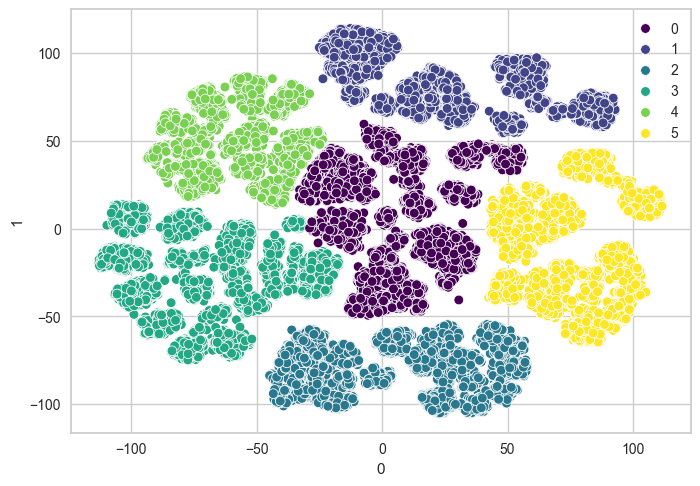

In [14]:
sns.scatterplot(x=sample[0], y=sample[1],
    hue=best_hier.labels_, palette="viridis")

Dendrogramme pour 6 groupes :

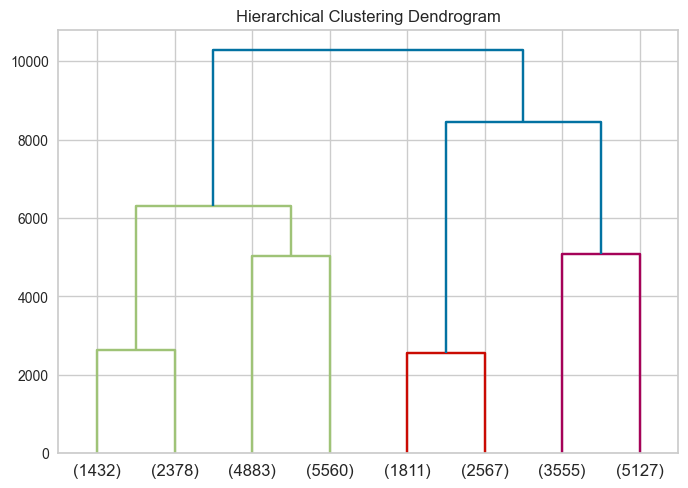

In [15]:
model = best_hier

# create the counts of samples under each node
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]).astype(float)

# plot it
dendrogram(linkage_matrix, truncate_mode="level", p=2, labels=model.labels_)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

Les scores et la clusterisation sont intéressants mais le temps de calcul de l'algorithme le rend inapplicable dans le cas de figure qui nous concerne.

En effet, les temps de calcul sont exponentiels et inadaptés au nombre d'individus des données clients :

<figure>
  <img src="https://i.stack.imgur.com/Yl4tV.png" alt="Temps de calcul selon les algorithmes, enchmark de HDBSCAN" width="600"/>
  <figcaption>Temps de calcul selon les algorithmes, <a href="https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html">benchmark de HDBSCAN</a></figcaption>
</figure>

# <a id='toc5_'></a>[Modèle DBSCAN](#toc0_)

Sources :
- [documentation Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
- [déterminer min_samples et Epsilon](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd)
- [déterminer la valeur idéale d'Epsilon](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf)
- [déterminer MinPts, cf. 4.2 (page 5)](https://cdn.aaai.org/KDD/1996/KDD96-037.pdf)

`DBSCAN` (*Density-Based Spatial Clustering of Applications with Noise*) est un modèle basé sur la densité.  
Il recherche des points avec de nombreux voisins proches et définissent un cluster s'ils contiennent suffisamment de voisins (paramètre *MinPts* : `min_samples`) dans une distance maximale donnée (paramètre *epsilon* : `eps`).

Estimation de la valeur idéale théorique d'epsilon :

In [16]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(sample)
distances, indices = neighbors_fit.kneighbors(sample)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig = go.Figure()
fig.add_trace(go.Scatter(y=distances))
fig.show()

En utilisant la technique du coude (attention à zoomer sans déformer la courbe), on situe **epsilon aux alentours de 1,1**.

Pour le paramètre `min_samples` ("MinPts"), il est souhaitable de le laisser assez bas à une **valeur de 4, pour les données à 2 dimensions**.

In [17]:
%%time

model = cluster.DBSCAN(eps=1.1, min_samples=4)
model.fit(sample)

CPU times: total: 78.1 ms
Wall time: 134 ms


DBSCAN(eps=1, min_samples=4)

Évaluation des scores et visualisation des données :

723 clusters (noise = 1017)
Silhouette: 0.16823208332061768, Davies-Bouldin: 1.4725703945651027


<Axes: xlabel='0', ylabel='1'>

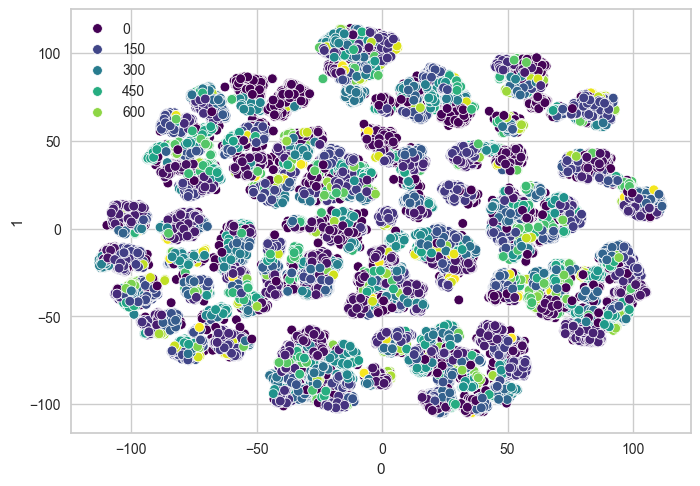

In [18]:
labels = model.labels_
score_sil = silhouette_score(sample, labels)
score_db = davies_bouldin_score(sample, labels)

# n_clusters in labels + ignore noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"{n_clusters_} clusters (noise = {n_noise_})")
print(f"Silhouette: {score_sil}, Davies-Bouldin: {score_db}")

sns.scatterplot(x=sample[0], y=sample[1], hue=labels,
    palette="viridis")

Il y a **bien trop de groupes pour que cela soit exploitable** et la visualisation des données fait état d'une clusterisation chaotique.

Tests de diminution du nombre de clusters avec différentes valeurs d'epsilon, de 0.5 à 6.5 :

In [19]:
epsilons = np.linspace(0.5, 6.5, 21)
num_clusters = [] ; n_noise = [] ; scores_sil = [] ; scores_db = []

for i in epsilons:
    model = cluster.DBSCAN(eps=i, min_samples=4)
    model.fit(sample)
    labels = model.labels_

    # n_clusters in labels + ignore noise
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    score_sil = silhouette_score(sample, labels)
    score_db = davies_bouldin_score(sample, labels)

    num_clusters.append(n_clusters_)
    n_noise.append(n_noise_)
    scores_sil.append(score_sil)
    scores_db.append(score_db)

In [20]:
# plot all scores
fig = go.Figure()
fig.add_trace(go.Scatter(x=epsilons, y=num_clusters,
    mode="lines+markers", name="n_clusters"))
fig.add_trace(go.Scatter(x=epsilons, y=n_noise,
    mode="lines+markers", name="n_noise"))    
fig.add_trace(go.Scatter(x=epsilons, y=scores_sil,
    mode="lines+markers", name="Silhouette"))    
fig.add_trace(go.Scatter(x=epsilons, y=scores_db,
    mode="lines+markers", name="Davies-Bouldin"))    
fig.update_layout(title="n_clusters, noise and scores by epsilon",
    xaxis_title="epsilon")
fig.show()

11 clusters (noise = 2)
Silhouette: 0.09571940451860428, Davies-Bouldin: 0.8702959438470429


<Axes: xlabel='0', ylabel='1'>

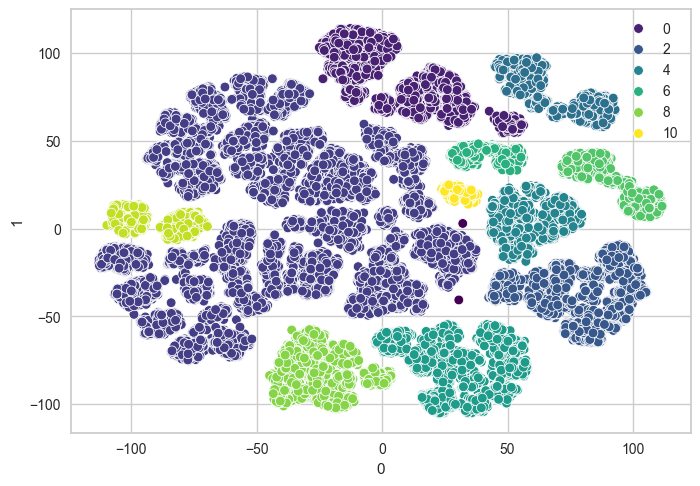

In [21]:
model = cluster.DBSCAN(eps=6.5, min_samples=4)
model.fit(sample)

labels = model.labels_
score_sil = silhouette_score(sample, labels)
score_db = davies_bouldin_score(sample, labels)

# n_clusters in labels + ignore noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"{n_clusters_} clusters (noise = {n_noise_})")
print(f"Silhouette: {score_sil}, Davies-Bouldin: {score_db}")

sns.scatterplot(x=sample[0], y=sample[1], hue=labels,
    palette="viridis")

Avec un epsilon très important, on arrive à diminuer fortement le nombre de clusters mais :
- **pas assez pour qu'il soit exploitable** par les équipes marketing
- **au prix d'une clusterisation non maîtrisée** (bruit, répartition ambigüe)
- avec des scores dans tous les cas peu satisfaisants

Ce modèle n'est pas adapté à la problématique.

# <a id='toc6_'></a>[Modèle k-Means](#toc0_)

Sources :
- [documentation Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
- [simulateur k-means pédagogique](https://kkevsterrr.github.io/K-Means/)
- [k-means++: the advantages of careful seeding](https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf)

Populaire et fiable, le modèle `kmeans` est basé sur des distances entre les points. Il permet une clusterisation très rapide et le **nombre de clusters** souhaité est précisé dès le départ comme **paramètre**.

Il procède par étapes :
- des centroïdes sont d'abord générés aléatoirement sur la distribution (un par groupe)
- l'algorithme calcule la distance entre tous les points et chaque point va dans le groupe du centroïde le plus proche
- chaque centroïde est déplacé en lieu et place centroïdes calculés selon la clusterisation de l'étape précédente
- l'opération est recommencée encore et encore jusqu'à convergence

Un [simulateur interactif](https://kkevsterrr.github.io/K-Means/) permet de comprendre aisément le principe.

Il y a plusieurs limites, notamment l'**initialisation aléatoire** et le fait que l'algorithme ne puisse faire que des **formes convexes**.

Les formes convexes correspondent souvent aux données, comme dans le cas présent.

L'initialisation aléatoire est parfois plus problématique et le modèle de base de Scikit-Learn inclut **un certain nombre d'itérations** pour arriver à un résultat moyen.  
Grâce à un type d'**initialisation plus récent, `kmeans++`**, on peut limiter l'aléa et donc le nombre d'itérations nécessaires.  
Cette initialisation se fait sur une distribution de probabilités et permet de cadrer cet aléa avec des centroïdes assez éloignés les uns des autres au départ pour diminuer voire (se passer) les itérations nécessaires.

Détermination du nombre de clusters optimal :

In [78]:
%%time

models_km = []

for n in n_clusters:
    # clustering
    model = cluster.KMeans(n_clusters=n, n_init='auto')
    model.fit(sample)

    # save models
    models_km.append(model)

    print(f"✅ model ok for {n} clusters")

✅ model ok for 3 clusters
✅ model ok for 4 clusters
✅ model ok for 5 clusters
✅ model ok for 6 clusters
CPU times: total: 141 ms
Wall time: 85 ms


Évaluation des scores par nombre de clusters :

In [79]:
scores_sil_km = [] ; scores_db_km = []

for i,m in enumerate(models_km):
    scores_sil_km.append(silhouette_score(sample, m.labels_))
    scores_db_km.append(davies_bouldin_score(sample, m.labels_))

    print(f"✅ scores ok for {n_clusters[i]} clusters model")

✅ scores ok for 3 clusters model
✅ scores ok for 4 clusters model
✅ scores ok for 5 clusters model
✅ scores ok for 6 clusters model


Affichage des scores :

In [80]:
# plot all scores
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(n_clusters), y=scores_sil_km,
    mode="lines+markers", name="silhouette"))
fig.add_trace(go.Scatter(x=list(n_clusters), y=scores_db_km,
    mode="lines+markers", name="Davies-Bouldin"))
fig.update_layout(title="Scores by n_clusters",
    xaxis_title="n_clusters", yaxis_title="scores")
fig.show()

# <a id='toc7_'></a>[Tests de stabilité et nombre de groupes](#toc0_)

Au vu des résultats ci-avant, k-means est a priori un modèle tout à fait valable pour la problématique, contrairement à DBSCAN et le clustering hiérarchique.

Pour **s'en assurer et déterminer le nombre idéal de groupes**, il est nécessaire de vérifier plusieurs autres critères, à commencer par la stabilité.

Il s'agit de vérifier que le modèle est suffisamment stable, à savoir que l'on obtient les mêmes résultats dans le temps.

Pour ce faire:
- une **boucle de 10 itérations sur chaque groupe** ($10 \times 4$, donc) est effectuée pour créer les modèles
- la **durée de calcul** est à nouveau mesurée
- puis les **divers tests** sont effectués (Silhouette + méthode du coude, Davies-Bouldin, visualisation des données regroupées, distance inter-groupe, équilibre des individus dans les groupes)
- et les **résultats comparés**

In [81]:
%%time

n_iter = range(1,11)
models_3 = [] ; models_4 = [] ; models_5 = [] ; models_6 = []

for n in n_iter:
    model = cluster.KMeans(n_clusters=3, n_init='auto')
    model.fit(sample)
    models_3.append(model)
    
    model = cluster.KMeans(n_clusters=4, n_init='auto')
    model.fit(sample)
    models_4.append(model)
    
    model = cluster.KMeans(n_clusters=5, n_init='auto')
    model.fit(sample)
    models_5.append(model)
    
    model = cluster.KMeans(n_clusters=6, n_init='auto')
    model.fit(sample)
    models_6.append(model)

CPU times: total: 1.41 s
Wall time: 982 ms


Évaluation des scores par nombre de clusters :

In [82]:
scores_sil_3 = [] ; scores_db_3 = []
scores_sil_4 = [] ; scores_db_4 = []
scores_sil_5 = [] ; scores_db_5 = []
scores_sil_6 = [] ; scores_db_6 = []

for i, e in enumerate(n_iter):
    scores_sil_3.append(silhouette_score(sample, models_3[i].labels_))
    scores_db_3.append(davies_bouldin_score(sample, models_3[i].labels_))

    scores_sil_4.append(silhouette_score(sample, models_4[i].labels_))
    scores_db_4.append(davies_bouldin_score(sample, models_4[i].labels_))

    scores_sil_5.append(silhouette_score(sample, models_5[i].labels_))
    scores_db_5.append(davies_bouldin_score(sample, models_5[i].labels_))

    scores_sil_6.append(silhouette_score(sample, models_6[i].labels_))
    scores_db_6.append(davies_bouldin_score(sample, models_6[i].labels_))

    print(f"✅ scores ok for iteration {e}")

✅ scores ok for iteration 1
✅ scores ok for iteration 2
✅ scores ok for iteration 3
✅ scores ok for iteration 4
✅ scores ok for iteration 5
✅ scores ok for iteration 6
✅ scores ok for iteration 7
✅ scores ok for iteration 8
✅ scores ok for iteration 9
✅ scores ok for iteration 10


Scores Silhouette selon les itérations :

In [83]:
# plot silhouette scores
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(n_iter), y=scores_sil_3,
    mode="lines+markers", name="sil_3"))
fig.add_trace(go.Scatter(x=list(n_iter), y=scores_sil_4,
    mode="lines+markers", name="sil_4"))
fig.add_trace(go.Scatter(x=list(n_iter), y=scores_sil_5,
    mode="lines+markers", name="sil_5"))
fig.add_trace(go.Scatter(x=list(n_iter), y=scores_sil_6,
    mode="lines+markers", name="sil_6"))
fig.update_layout(title="Silhouette scores by n_clusters and iteration",
    xaxis_title="iterations", yaxis_title="Silhouette scores", width=800)
fig.show()

Davies-Bouldin selon les itérations :

In [84]:
# plot Davies-Bouldin scores
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(n_iter), y=scores_db_3,
    mode="lines+markers", name="db_3"))
fig.add_trace(go.Scatter(x=list(n_iter), y=scores_db_4,
    mode="lines+markers", name="db_4"))
fig.add_trace(go.Scatter(x=list(n_iter), y=scores_db_5,
    mode="lines+markers", name="db_5"))
fig.add_trace(go.Scatter(x=list(n_iter), y=scores_db_6,
    mode="lines+markers", name="db_6"))
fig.update_layout(title="Davies-Bouldin scores by n_clusters and iteration",
    xaxis_title="iterations", yaxis_title="D-B scores", width=800)
fig.show()

Affichage des données :

In [85]:
models_km[0].cluster_centers_

array([[-60.211304,   4.161805],
       [ 35.121113,  51.858063],
       [ 28.654371, -52.701023]], dtype=float32)

In [86]:
models_km[0].cluster_centers_[:, 0]

array([-60.211304,  35.121113,  28.654371], dtype=float32)

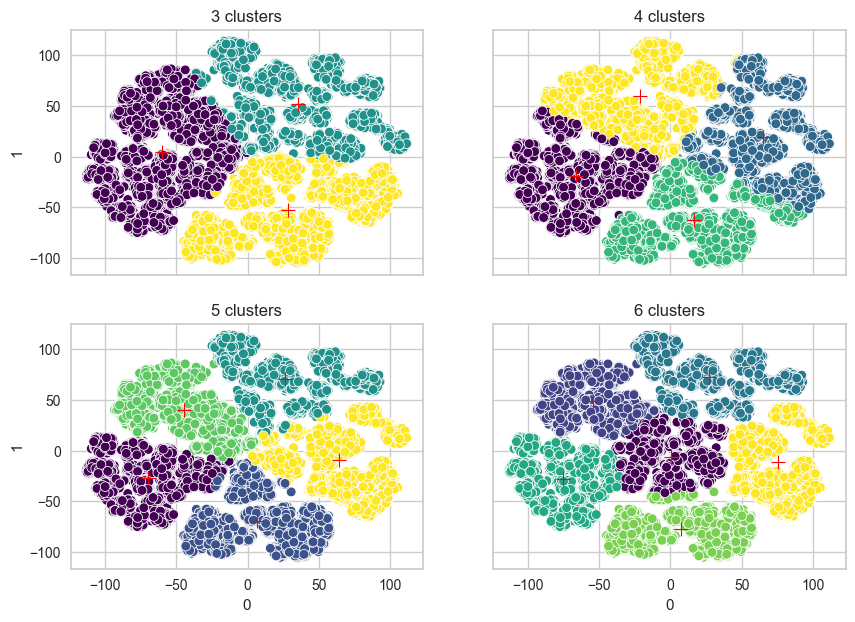

In [87]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,7))
for i,e in enumerate(n_clusters):
    if i < 2:
        # plot data
        sns.scatterplot(ax=axes[0, i], x=sample[0], y=sample[1],
            hue=models_km[i].labels_, palette="viridis", legend=False)
        # plot centroids
        sns.scatterplot(ax=axes[0, i], marker="+", s=100, c="red",
        x=models_km[i].cluster_centers_[:, 0],
        y=models_km[i].cluster_centers_[:, 1])
        axes[0, i].set_title(f"{e} clusters")
    else:
        sns.scatterplot(ax=axes[1, i-2], x=sample[0], y=sample[1],
            hue=models_km[i].labels_, palette="viridis", legend=False)
        sns.scatterplot(ax=axes[1, i-2], marker="+", s=100, c="red",
        x=models_km[i].cluster_centers_[:, 0],
        y=models_km[i].cluster_centers_[:, 1])
        axes[1, i-2].set_title(f"{e} clusters")
plt.show()

Test du coude avec la bibliothèque Yellowbrick :

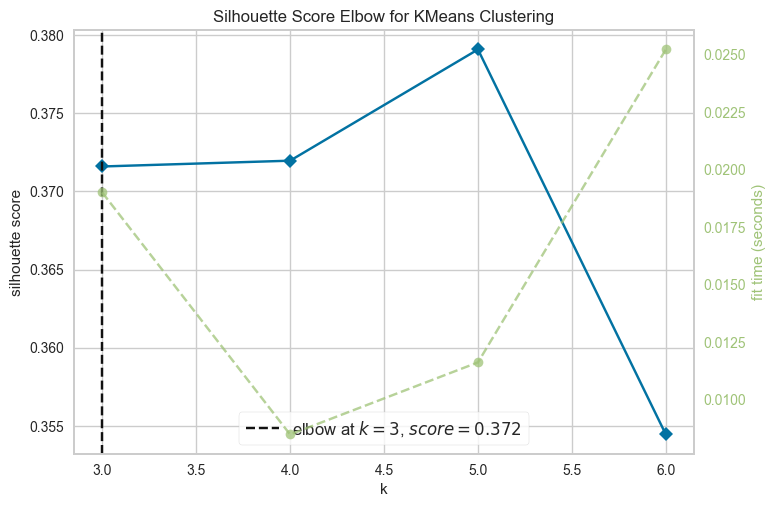

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [96]:
# Instantiate the clustering model and visualizer
model = cluster.KMeans(n_init='auto')

visualizer = yb.KElbowVisualizer(model, k=(3,7), metric='silhouette')
visualizer.fit(sample)
visualizer.show()

Distance intercluster :

c:\Users\jlemaire\projets\OC_projects\env\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



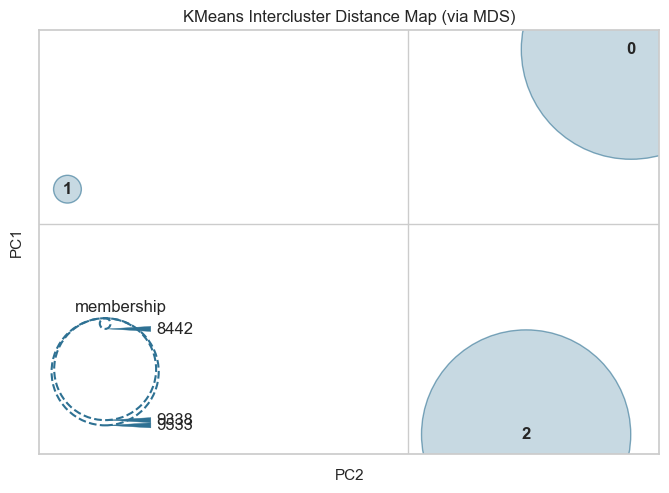

c:\Users\jlemaire\projets\OC_projects\env\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



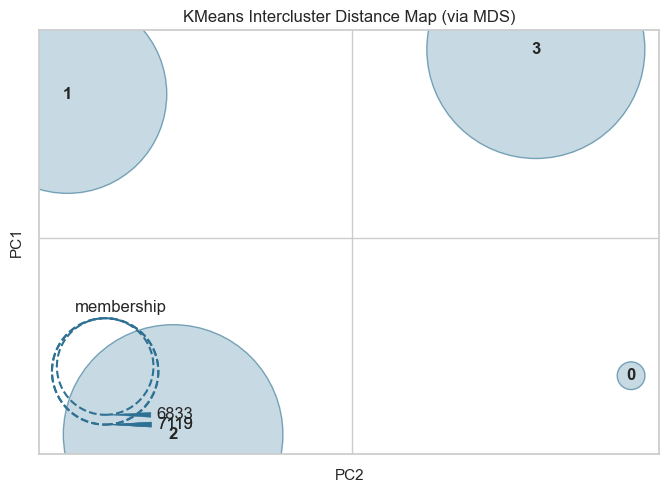

c:\Users\jlemaire\projets\OC_projects\env\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



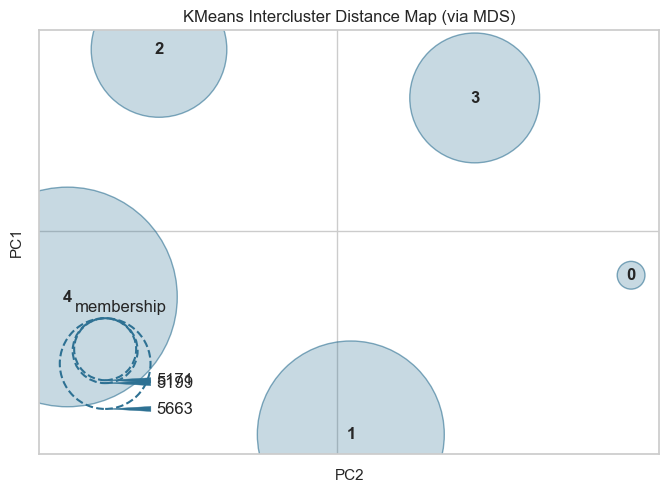

c:\Users\jlemaire\projets\OC_projects\env\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



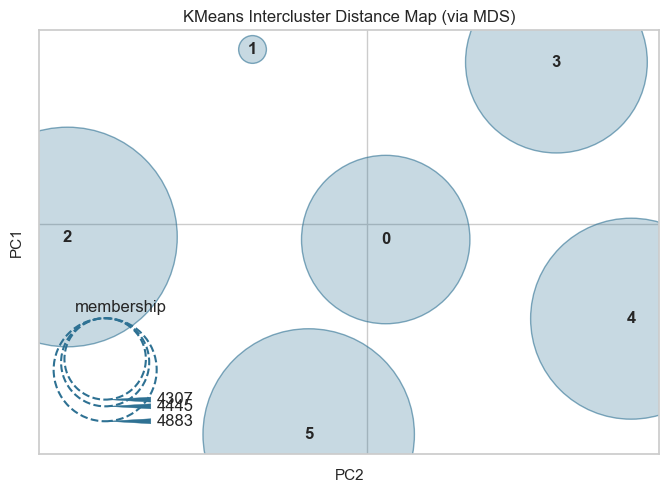

In [89]:
for i,e in enumerate(n_clusters):
    viz_icd = yb.InterclusterDistance(models_km[i])
    viz_icd.fit(sample)
    viz_icd.show()

Silhouette et équilibrage des individus :

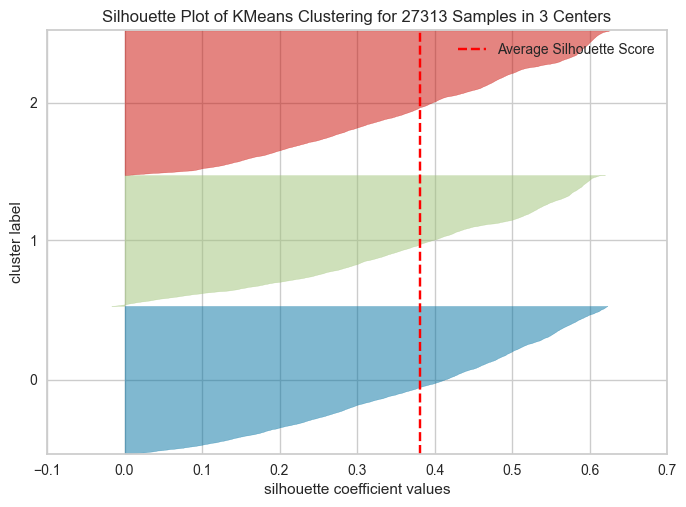

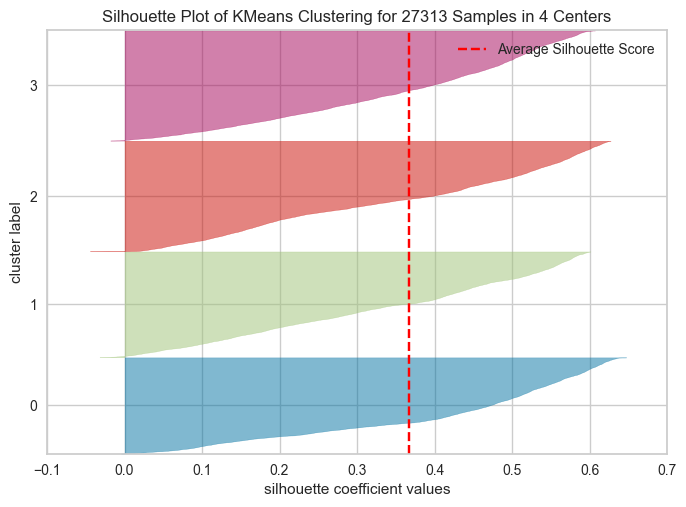

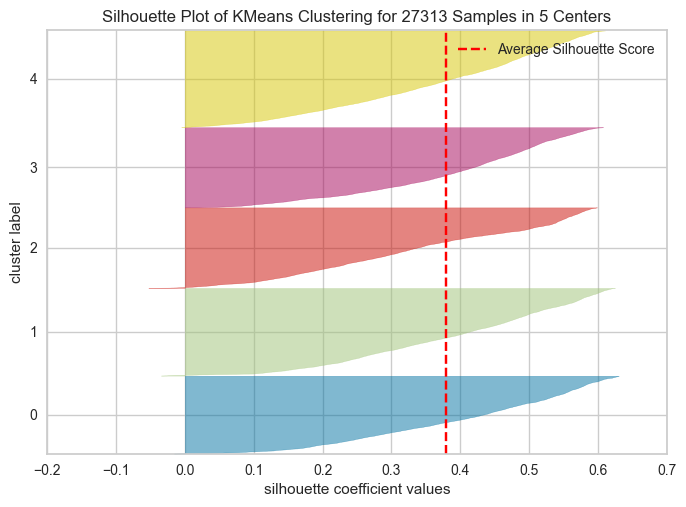

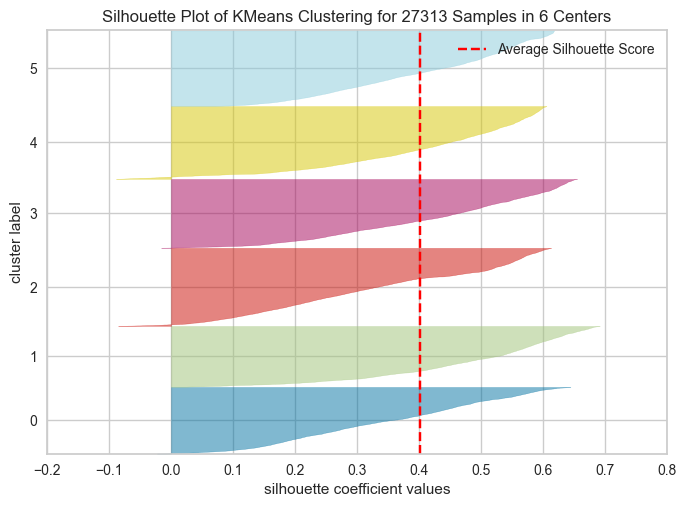

In [90]:
for i,e in enumerate(n_clusters):
    viz_sil = yb.SilhouetteVisualizer(models_km[i], colors='yellowbrick')
    viz_sil.fit(sample)
    viz_sil.show()

# <a id='toc8_'></a>[Conclusions](#toc0_)

## <a id='toc8_1_'></a>[Choix du modèle](#toc0_)

Avec un **clustering k-means à 5 groupes**, on obtient le meilleur compromis entre :
- les scores silhouette et Davies-Bouldin
- la stabilité du clustering selon les itérations
- l'inertie et la séparation des groupes
- la durée de calcul
- l'homogénéité des individus dans les groupes
- le nombre d'erreurs de groupe
- interprétabilité et explicabilité pour le marketing

## <a id='toc8_2_'></a>[Application sur les données client et export](#toc0_)

Application du clustering k-Means sur 5 groupes :

In [91]:
model = cluster.KMeans(n_clusters=5, n_init='auto')
model.fit(df)

KMeans(n_clusters=5, n_init='auto')

Application sur nos données client :

In [92]:
with open('customers.pkl', 'rb') as f: customers = pickle.load(f)
# add cluster to each customer
customers["customer_cluster"] = model.labels_
# sort features
customers_c = customers.reindex(sorted(customers.columns), axis=1)

Agrégation sur le jeu de données global :

In [93]:
# keep only clusters and customer ID
customers_clusters = customers[["customer_unique_id", "customer_cluster"]]
# load data and merge clusters
with open('data.pkl', 'rb') as f: data = pickle.load(f)
data_c = merge_df(data, customers_clusters, "customer_unique_id")
# sort features
data_c = data_c.reindex(sorted(data_c.columns), axis=1)

Checking shapes:
(107927, 70) + (91043, 2)
= (107927, 71)
Merge ok


Export des jeux de données avec clusters :

In [94]:
with open('data_clustered.pkl', 'wb') as f: pickle.dump(data_c, f)
with open('customers_clustered.pkl', 'wb') as f: pickle.dump(customers_c, f)